In [20]:
import pandas as pd

dataset = pd.read_csv('/content/lung_cancer.csv')
dataset.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [22]:
dataset.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [23]:
dataset = dataset.drop(columns = ['Name'])
dataset = dataset.drop(columns = ['Surname'])
dataset

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1
5,34,0,10,0,0
6,58,15,10,0,0
7,22,12,5,2,0
8,45,2,6,0,0
9,52,18,4,5,1


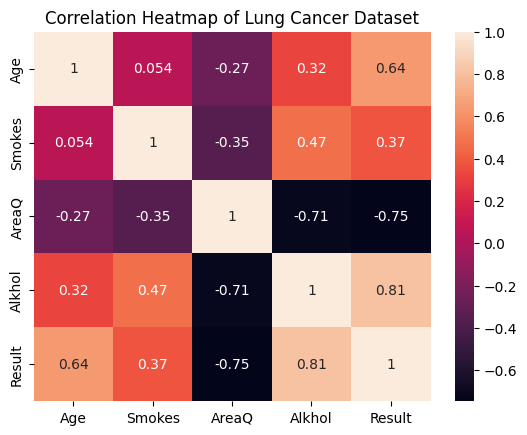

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap of Lung Cancer Dataset')
plt.show()

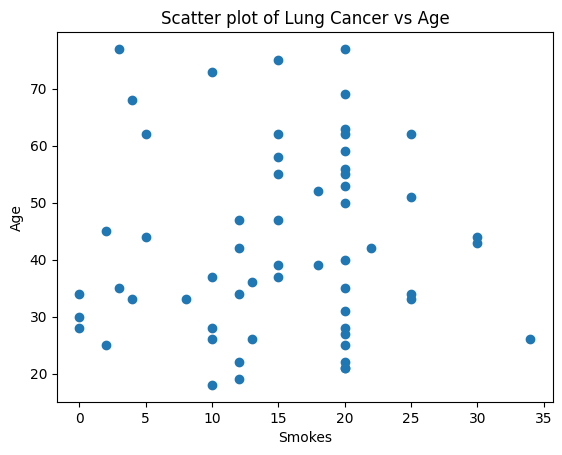

In [4]:
import matplotlib.pyplot as plt
plt.scatter(dataset['Smokes'], dataset['Age'])
plt.title("Scatter plot of Lung Cancer vs Age")
plt.xlabel("Smokes")
plt.ylabel("Age")
plt.show()

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     59 non-null     int64
 1   Smokes  59 non-null     int64
 2   AreaQ   59 non-null     int64
 3   Alkhol  59 non-null     int64
 4   Result  59 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB


In [7]:
x = dataset.drop(columns = ['Result'])
y = dataset['Result']

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    x,y, random_state=42, test_size= 0.2
)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.6819113494464945

In [11]:
from sklearn.metrics import mean_squared_error as mse
predicted = lr.predict(xtest)
error = mse(ytest, predicted) ** .5
print(error)

0.26586907828791956


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

models = [RandomForestRegressor(), DecisionTreeRegressor(), LinearRegression()]

errors = {}

for model in models:
    model.fit(xtrain,ytrain)
    name = type(model).__name__
    score = model.score(xtest,ytest)*100
    errors[name] = score

In [13]:
errors

{'RandomForestRegressor': 83.155,
 'DecisionTreeRegressor': 62.5,
 'LinearRegression': 68.19113494464945}

<BarContainer object of 3 artists>

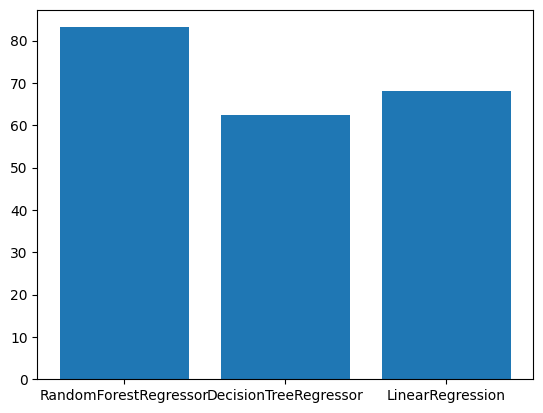

In [14]:
import matplotlib.pyplot as plt

plt.bar(errors.keys(),errors.values())

/tmp/ipython-input-2443405957.py:31: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


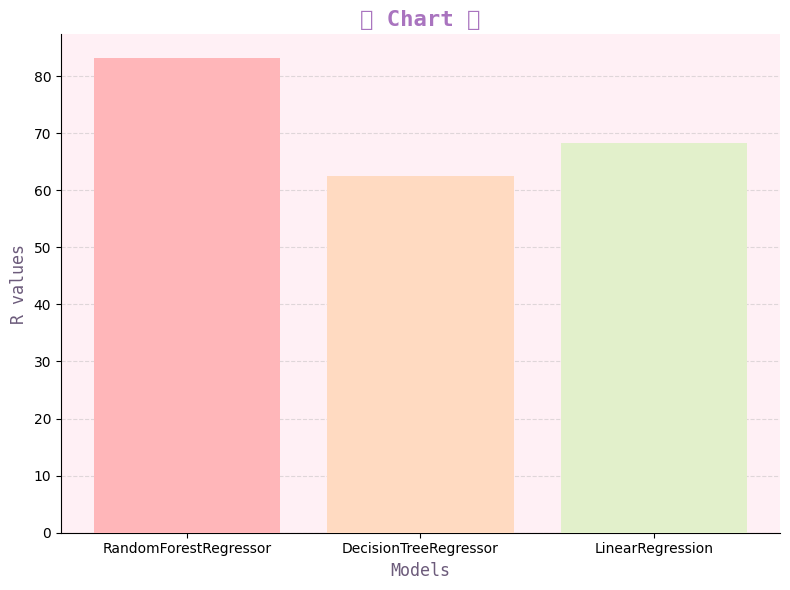

In [15]:
import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your actual 'errors' dictionary)

# Define a cute pastel color palette
cute_colors = ['#FFB6B9', '#FFDAC1', '#E2F0CB', '#B5EAD7', '#C7CEEA']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(errors.keys(), errors.values(), color=cute_colors[:len(errors)])

# Add rounded edges to bars
for bar in bars:
    bar.set_linewidth(0)
    bar.set_edgecolor('none')
    bar.set_zorder(3)

# Add labels and title with cute fonts
plt.title('🐾 Chart 🐾', fontsize=16, fontweight='bold', color='#A974BF', fontname='DejaVu Sans Mono')
plt.xlabel('Models', fontsize=12, color='#6C5B7B', fontname='DejaVu Sans Mono')
plt.ylabel('R values', fontsize=12, color='#6C5B7B', fontname='DejaVu Sans Mono')

# Set background color
plt.gca().set_facecolor('#FFF0F5')  # Light lavender pink
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

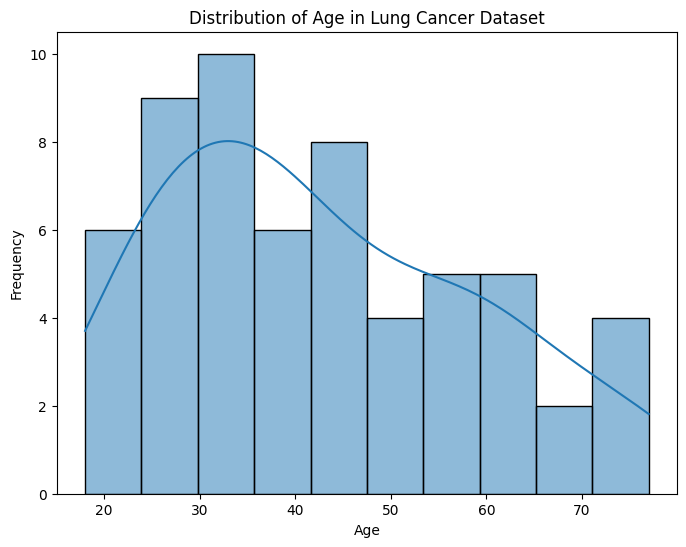

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Age', kde=True, bins=10)
plt.title('Distribution of Age in Lung Cancer Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

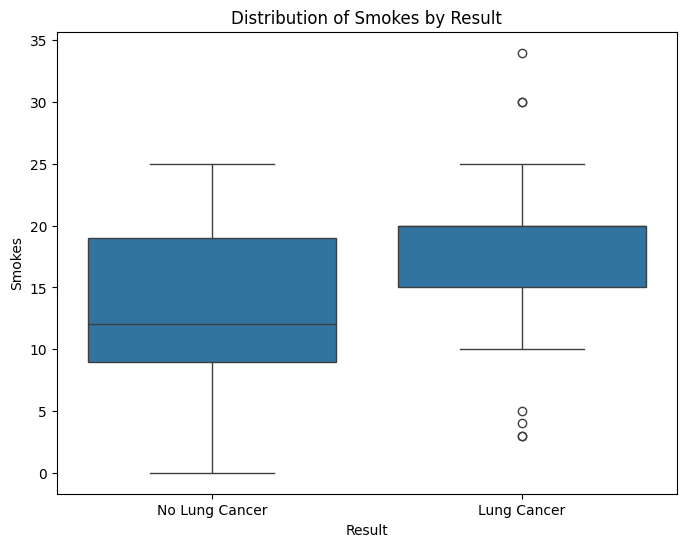

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='Result', y='Smokes')
plt.title('Distribution of Smokes by Result')
plt.xlabel('Result')
plt.ylabel('Smokes')
plt.xticks([0, 1], ['No Lung Cancer', 'Lung Cancer'])
plt.show()

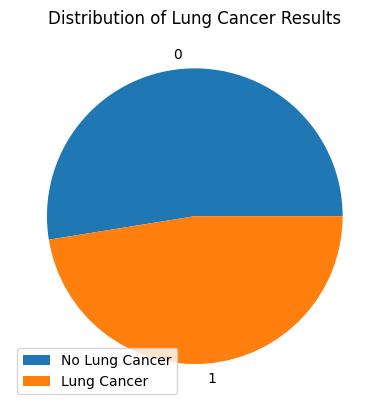

In [33]:
import matplotlib.pyplot as plt

# Count the occurrences of each result
result_counts = dataset['Result'].value_counts()

# Create the pie chart
plt.pie(result_counts, labels=result_counts.index)
plt.title('Distribution of Lung Cancer Results')
plt.legend(['No Lung Cancer', 'Lung Cancer'], loc='best')
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred_logreg = logreg.predict(xtest)

# Evaluate the model
accuracy_logreg = accuracy_score(ytest, y_pred_logreg)
print(f"Accuracy of Logistic Regression: {accuracy_logreg:.4f}")

print("\nClassification Report:")
print(classification_report(ytest, y_pred_logreg))

Accuracy of Logistic Regression: 0.9167

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12

